In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('data1.xlsx',header=None) #using pandas to load the excel file
data = data.dropna(axis=1, how='any') #drop nan from the data

In [3]:
X = data.iloc[1:,[7,9]]
Y = data.iloc[1:,[25]]
X = X.to_numpy() #conver data frame to numpy array
Y = Y.to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [5]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Establish a model
model = SVR(C=110, cache_size=500, epsilon=1, kernel='rbf')

In [7]:
# Train the model - this will take a minute
model.fit(X_train, y_train)

C:\Users\doad224\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=110, cache_size=500, coef0=0.0, degree=3, epsilon=1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
# Score the model
model.score(X_test, y_test)

0.42516433774181184

In [9]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)
def rmse(predictions, targets): 
    return np.sqrt(((predictions - targets) ** 2).mean())

In [10]:
rmse(y_pred, y_test)

4.661152496219648

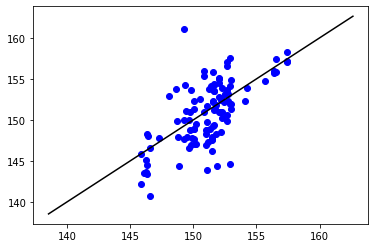

In [11]:
plt.scatter(y_pred, y_test, c = 'b',marker = 'o')
#plt.plot(y_pred, y_test)
plt.plot([Y.min(), Y.max()],[Y.min(), Y.max()],'k-')

C:\Users\doad224\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\doad224\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\doad224\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\doad224\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A 

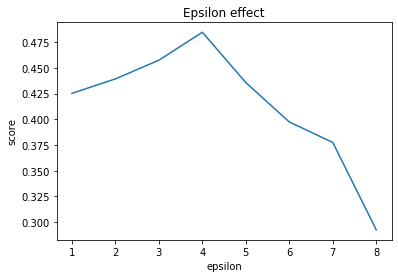

In [12]:
# Not a great score. Try other epsilons - this will take about 5 minutes.
epsilons = np.arange(1, 9)
scores = []
for e in epsilons:
    model.set_params(epsilon=e)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.plot(epsilons, scores)
plt.title("Epsilon effect")
plt.xlabel("epsilon")
plt.ylabel("score")
plt.show()

C:\Users\doad224\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\doad224\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\doad224\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\doad224\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A 

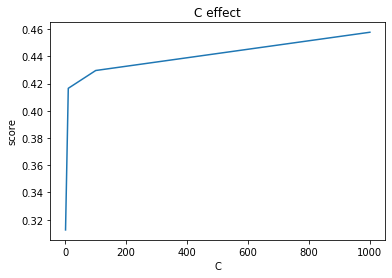

In [13]:
# Try other C's - This will take about a minute or so
model.set_params(epsilon=5)
Cs = [1e0, 1e1, 1e2, 1e3]
scores = []
for c in Cs:
    model.set_params(C=c)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.plot(Cs, scores)
plt.title("C effect")
plt.xlabel("C")
plt.ylabel("score")
plt.show()